In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [4]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

In [5]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

Чтобы этой ошибки не возникало, необходимо закодировать данные.

В разделе EDA-3 вы познакомились с такими методами кодирования, как:

* порядковое кодирование;
* двоичное кодирование;
* однократное кодирование.


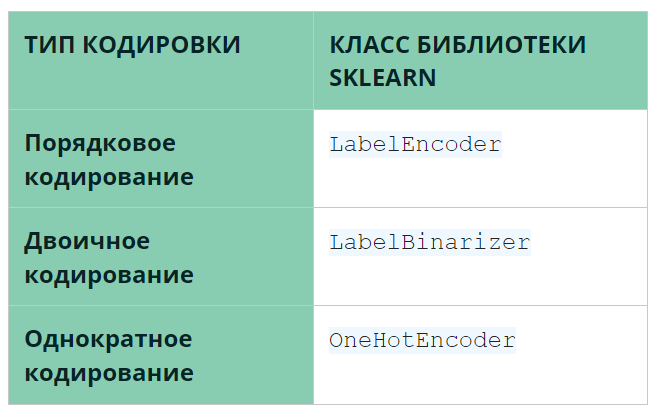

Преимущество использования одной библиотеки состоит в типичности методов. Например, вы знаете, что для обучения модели в sklearn используется метод fit(). При кодировании признаков здесь также применяют fit() для подгонки кодировщика под выборку и transform() — для преобразования данных в числа.

Алгоритм кодирования:

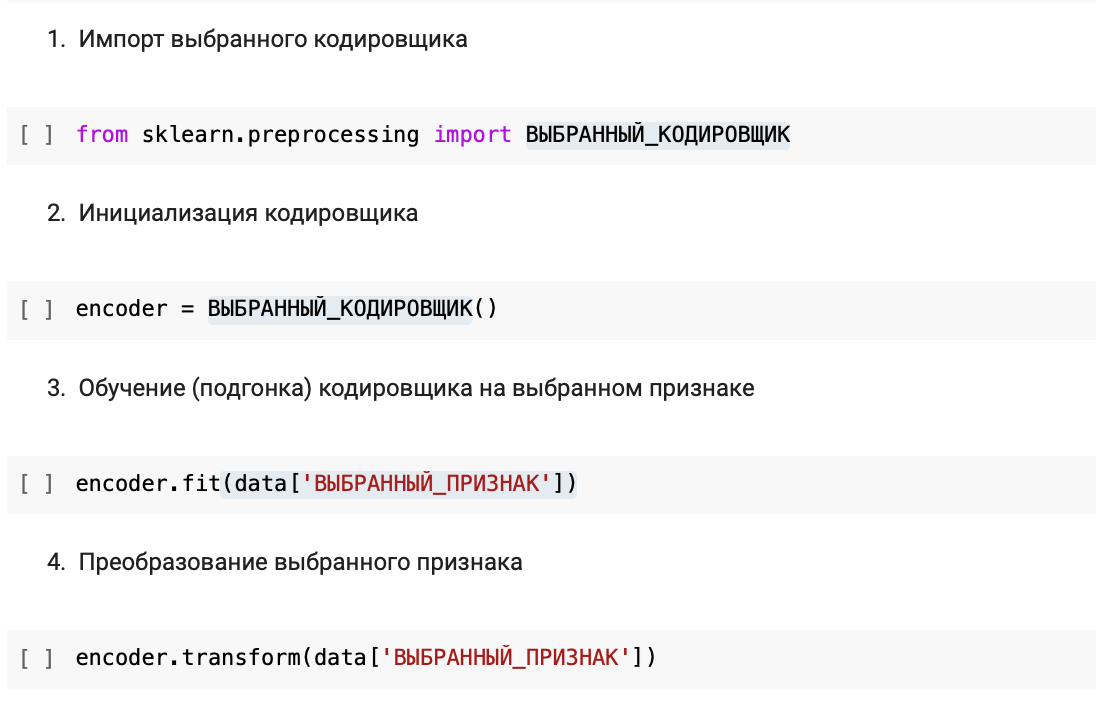

condition — это порядковый признак, который уже представлен в числовом формате, его кодировать не нужно. cylinders — номинальный признак, его нужно закодировать.

Важно производить кодирование номинальных признаков, даже если они уже представлены в числовом формате, так как, в отличие от порядковых признаков, категории номинальных являются независимыми. В случае порядкового кодирования таких признаков мы вносим искусственные закономерности в данные (например, чем больше числовой код цилиндров, тем лучше, хотя это необязательно так).

_______________________
Сторонний пример

In [ ]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

___________________________________

In [7]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода get_feature_names_out() получим список новых названий колонок:

In [8]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


Отлично, категориальные признаки закодированы. Теперь нам необходимо соединить преобразованные данные с исходными.

Напомним, что у библиотеки pandas есть дефолтный метод get_dummies() для получения однократного кодирования признаков. Однако OneHotEncoder способен принимать на вход как таблицы, так и numpy-массивы.

3.7 Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

Для ответа на поставленный вопрос выполните следующие шаги:

1. Загрузите данные в локальную директорию с помощью команды !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx.
2. Загрузите данные в память ноутбука с помощью функции read_excel() библиотеки pandas.
3. Закодируйте столбцы из списка columns_to_change.
4. Преобразуйте полученный массив закодированных данных в формат DataFrame, явно указав имена колонок.

* Подсказка 1
В качестве индекса используйте data.index, в качестве колонок — column_names.

* Подсказка 2
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)
5. Соедините новую таблицу с исходной.
* Подсказка 1
Используйте метод pd.concat().

* Подсказка 2
Для того чтобы соединить таблицы по столбцам, необходимо явно указать axis = 1.

* Подсказка 3
data_new = pd.concat([data, data_onehot], axis=1)
6. Удалите закодированные столбцы columns_to_change из полученной таблицы.
* Подсказка 1
Для удаления столбцов воспользуйтесь методом drop().

* Подсказка 2
data_new = data_new.drop(columns=columns_to_change)
7. Выведите на экран форму полученной таблицы.
* Подсказка 1
Воспользуйтесь методом shape().

In [9]:
data.shape

# верный ответ 7017,30

(7017, 12)

In [11]:
data.to_excel('data/data.xlsx')